# A/B Test for MuscleHub
***

## Introduction

Currently, when a MuscleHub visitor purchases a membership, they follow the following steps:

1. Take a **fitness test** with a personal trainer.
2. Fill out an **application** for the gym.
3. Send in their payment for their first month’s **membership**.

The management thinks that the fitness test intimidates some prospective members, so we will set up an A/B test.

Visitors are randomly be assigned to one of two groups:

* Group A is still asked to take a fitness test with a personal trainer.
* Group B skips the fitness test and proceed directly to the application.

One hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A. So that the null and alternate hypotheses are as follows:

* **Null Hypothesis** = There will no difference between the visitors in Group A that purchase membership and the visitors in Group B that purchase membership.

* **Alternate Hypothesis** = There will be **more visitors in Group B that will purchase membership than visitors in Group A that will purchase membership.**

The significance threshold we will set as the benchmark to either accept or fail to reject the null hypothesis will be: 𝛼 = 0.05

We will analyze the data and create a presentation with your knowledge of conducting A/B testing with Python.

## Import the dataset

Loading all four CSV files (fitness_tests, purchases, visits, applications) using pandas into dataframes.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
input_dir = '/Users/rohitha/Documents/VS_Code/Projects/A:B Testing/MuscleHub_AB/input/'


fitness_tests = pd.read_csv(input_dir + '/fitness_tests.csv')
purchases = pd.read_csv(input_dir + '/purchases.csv')
visits = pd.read_csv(input_dir + '/visits.csv')
applications = pd.read_csv(input_dir + '/applications.csv')

In [43]:
print('Fitness:\n', fitness_tests.head())
print('Purchases:\n', purchases.head())
print('Visits:\n', visits.head())
print('Applications:\n', applications.head())

Fitness:
   first_name last_name                   email  gender fitness_test_date
0        Kim    Walter   KimWalter58@gmail.com  female        2017-07-03
1        Tom   Webster        TW3857@gmail.com    male        2017-07-02
2     Marcus     Bauer  Marcus.Bauer@gmail.com    male        2017-07-01
3    Roberta      Best      RB6305@hotmail.com  female        2017-07-02
4     Carrie   Francis      CF1896@hotmail.com  female        2017-07-05
Purchases:
   first_name last_name                    email  gender purchase_date
0        Roy    Abbott    RoyAbbott32@gmail.com    male    2017-08-18
1    Roberta   Acevedo         RA8063@gmail.com  female    2017-09-16
2     Vernon    Acosta    VAcosta1975@gmail.com    male    2017-07-20
3     Darren    Acosta  DAcosta1996@hotmail.com    male    2017-07-27
4       Dawn    Adkins    Dawn.Adkins@gmail.com  female    2017-08-24
Visits:
   first_name last_name                          email  gender visit_date
0      Karen   Manning        Karen.Ma

## Join all of your data

It would be helpful to have a single DataFrame with all of this data. 

Create a DataFrame containing all of this data. Keep in mind that not all visits in **visits.csv** occurred during the A/B test. You’ll only want to pull data where `visit_date` is on or after 7-1-17.


You'll need the following columns:

* `visits.first_name`
* `visits.last_name`
* `visits.gender`
* `visits.email`
* `visits.visit_date`
* `fitness_tests.fitness_test_date`
* `applications.application_date`
* `purchases.purchase_date`

In [44]:
print("Total visits:", visits.shape)
visits = visits[visits['visit_date'] >= '7-1-17']
print("Visits on or after 7-1-17:", visits.shape)

Total visits: (6000, 5)
Visits on or after 7-1-17: (5000, 5)


In [45]:
'''

    Merge visits fitness_tests applications and purchases 
    with unique identifier as first_name + last_name + email + gender
    
'''
df = visits.merge(
        fitness_tests
        , on=['first_name', 'last_name', 'email', 'gender']
        , how='left').merge(
                        applications
                        , on=['first_name', 'last_name', 'email', 'gender']
                        , how='left').merge(
                                        purchases
                                        , on=['first_name', 'last_name', 'email', 'gender']
                                        , how='left')
df.shape

(5004, 8)

In [46]:
# We have all attributes required in the final data set
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN


## Visualize the Groups

Having compiled the DataFrame we can use to begin our project.

Make at least one visualization that depicts the distribution of potential customers that were given a fitness test and those that were not:
- Create a bar plot of the test group variable's distribution.
- Create a pie cart using `plt.pie()`.

To conduct the A/B test we need to determine which customers were given a fitness test. We'll use the variable containing fitness test dates to create a new variable with values of A if the fitness test date variable is not None, and B if the fitness test date variable is None.

In [47]:
# Create new ab_test_group variable
df['ab_test_group'] = df.fitness_test_date.apply(lambda x:
                                                'A' if pd.notnull(x) else 'B')

In [48]:
# Obtain value counts of each group
df['ab_test_group'].value_counts()

A    2504
B    2500
Name: ab_test_group, dtype: int64

In [49]:
# Obtain percentages of each group
df['ab_test_group'].value_counts(normalize=True)

A    0.5004
B    0.4996
Name: ab_test_group, dtype: float64

<AxesSubplot:xlabel='ab_test_group', ylabel='count'>

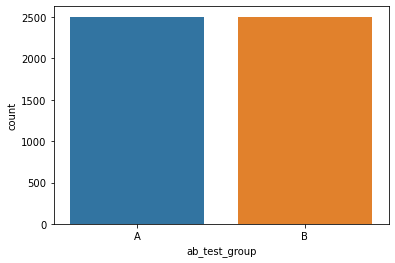

In [50]:
# Create a barplot of test group
sns.countplot(x="ab_test_group", data=df)

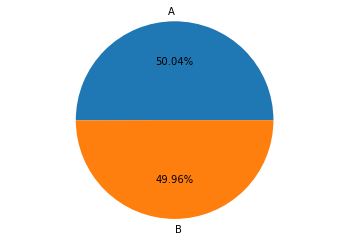

In [51]:
# Create a pie chart of test group
plt.pie(df['ab_test_group'].value_counts(), labels=['A', 'B'], autopct='%1.2f%%')
plt.axis('equal')
plt.show()

## Determine the count of applications

Recall that the sign-up process for MuscleHub has several steps:

1. Take a fitness test with a personal trainer (only Group A).
2. Fill out an application for the gym.
3. Send in their payment for their first month's membership.

Determine the percentage of people in each group who complete Step 2, filling out an application.

In [52]:
# Create new ab_test_group variable
df['is_application'] = df.application_date.apply(lambda x:
                                                'Application' if pd.notnull(x) else 'No application')

In [53]:
df['is_application'].value_counts()

No application    4429
Application        575
Name: is_application, dtype: int64

In [54]:
df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,No application
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,No application
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,Application
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,No application


Now we'll group by is_application and ab_test_group to count how many people from Group A and Group B either do or don't pick up an application.
We'll save this result as a new pandas DataFrame called app_counts.

In [55]:
# Create new app_counts DataFrame
app_counts = df.groupby(
                    ['ab_test_group', 'is_application'])\
                       .first_name\
                       .count()\
                       .reset_index()
app_counts

,ab_test_group,is_application,first_name
0,A,Application,250
1,A,No application,2254
2,B,Application,325
3,B,No application,2175


Next, we'll calculate the percent of people in each group who complete an application. It's going to be much easier to do this if we pivot the new DataFrame such that:
* The index is ab_test_group
* The columns are is_application
After pivoting, we'll save it to the variable app_pivot.

In [56]:
# Pivot app_counts DataFrame
app_pivot = app_counts.pivot(
                        columns='is_application'
                        , index='ab_test_group'
                        , values='first_name')\
            .reset_index()

# View app_pivot
app_pivot

is_application,ab_test_group,Application,No application
0,A,250,2254
1,B,325,2175


Next, we'll define a new column called Total, which is the sum of Application and No Application.

In [57]:
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No application']
app_pivot

is_application,ab_test_group,Application,No application,Total
0,A,250,2254,2504
1,B,325,2175,2500


Finally, we'll calculate another column called Percent with Application, which is equal to Application divided by Total.

In [58]:
app_pivot['Percent with Application'] = app_pivot['Application']/app_pivot['Total']
app_pivot

is_application,ab_test_group,Application,No application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

## Calculate the statistical significance of applications

Having calculated the difference in who turned in an application between groups, determine if this difference is statistically significant.

Choose a hypothesis test, import it from scipy and perform it. 
* Be sure to note the p-value. Is this result significant?

In [59]:
# Import hypothesis test module
from scipy.stats import chi2_contingency

# Calculate the p-value
contingency = [[250, 2254], [325, 2175]]
chi2_contingency(contingency)

(10.893961295282612,
 0.0009647827600722304,
 1,
 array([[ 287.72981615, 2216.27018385],
        [ 287.27018385, 2212.72981615]]))

A p-value of 0.00096 relative to a significance threshold of alpha = 0.05 indicates that there is a statistically signifant difference between the two groups.

## Detemine the count of memberships from applications

Of those who picked up an application, how many purchased a membership?

Determine how many potential customers purchased a membership out of those that picked up an application.

It looks like people who took the fitness test were more likely to purchase a membership if they picked up an application. Why might that be?

In [60]:
# Create new ab_test_group variable
df['is_member'] = df.purchase_date.apply(lambda x:
                                                'Member' if pd.notnull(x) else 'Not Member')

df.head()

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,2017-07-03,NaN,NaN,A,No application,Not Member
1,Tom,Webster,TW3857@gmail.com,male,7-1-17,2017-07-02,NaN,NaN,A,No application,Not Member
2,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
4,Roberta,Best,RB6305@hotmail.com,female,7-1-17,2017-07-02,NaN,NaN,A,No application,Not Member


Now, we'll create a DataFrame called just_apps that contains only people who picked up an application.

In [61]:
# Create the just_apps DataFrame
just_apps = df[df.is_application == 'Application']
just_apps.shape

(575, 11)

Next, we'll do a .groupby() to find out how many people in just_apps are and aren't members from each group.

In [62]:
# How many became members after applying, from a and b test groups. Those who take fitness and not take fitness tests.
member_count = just_apps.groupby(
                            ['ab_test_group', 'is_member'])\
                        .first_name\
                        .count()\
                        .reset_index()

# Pivot member_count
member_pivot = member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()
member_pivot

is_member,ab_test_group,Member,Not Member
0,A,200,50
1,B,250,75


In [63]:
# Create the Total variable
member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']

# Create the Percent Purchase variable
member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


## Calculate the statistical significance of memberships

Calculate if the difference between the following groups is statistically significant: 
- The customers that picked up an application and took a fitness test.
- The customers that did not take a fitness test and picked up an application.

In [64]:
# Calculate the p-value
contingency = [[200, 50], [250, 75]]
chi2_contingency(contingency)

(0.615869230769231,
 0.43258646051083327,
 1,
 array([[195.65217391,  54.34782609],
        [254.34782609,  70.65217391]]))

A p-value of 0.432 relative to a significance threshold of 0.05 does not refelct a statistically significant difference between the two groups, and would lead us to fail to reject the null hypothesis.

## Detemine the count of all memberships

Previously, you looked at what percentage of people who picked up applications purchased memberships. 

Now, determine what percentage of ALL visitors purchased memberships. 

In [65]:
# Create final_member_count DataFrame
final_member_count = df.groupby(
                            ['ab_test_group', 'is_member'])\
                       .first_name\
                       .count()\
                       .reset_index()

# Pivot final_member_count
final_member_pivot = final_member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

# Create the Total variable
final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']

# Create the Percent Purchase variable
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


Previously, 
* when we only considered people who had already picked up an **application**, we saw that there was no significant difference in membership between Group A and Group B.
Now, 
* when we consider all people who **visit** MuscleHub, we see that there might be a significant difference in memberships between Group A and Group B.

## Calculate the statistical significance between groups

Determine if there is a significant difference in memberships between Group A and Group B.

In [66]:
# Calculate the p-value
contingency = [[200, 2304], [250, 2250]]
chi2_contingency(contingency)

(5.949182292591156,
 0.014724114645783203,
 1,
 array([[ 225.17985612, 2278.82014388],
        [ 224.82014388, 2275.17985612]]))

A p-value of 0.0147 relative to a significance threshold of 0.05 indicates that there is a statistically signifant difference between the two groups. This informs us that we should not reject Janet's hypothesis that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A.
However, it is important to note that when assessing the groups among those customers that filled out an application, those that completed a fitness test (Group A), were more likely to make a purchase than those customers that did not complete a fitness test (Group B).

## Visualize the results

Create visualizations for Janet that show the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:

- Percent of visitors who apply.
- Percent of applicants who purchase a membership.
- Percent of visitors who purchase a membership.

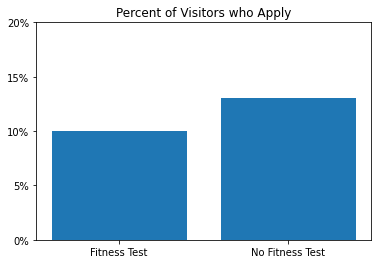

In [67]:
ax = plt.subplot()
plt.bar(range(len(app_pivot)),
       app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.title("Percent of Visitors who Apply")
plt.show()

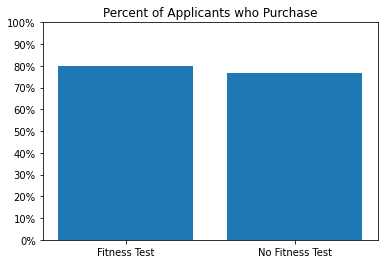

In [68]:
# Percent of Applicants who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title("Percent of Applicants who Purchase")
plt.show()

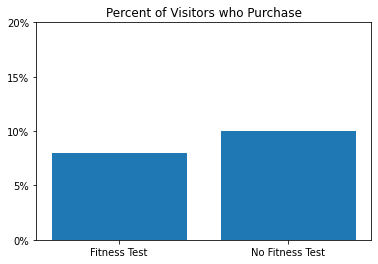

In [69]:
# Percent of Visitors who Purchase
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)),
       final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(final_member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.title("Percent of Visitors who Purchase")
plt.show()

## Next Steps

We have done a valuable work, let's prepare a presentation to showcase our work to the management.

## Challenge Assignment

- Develop a presentation that demonstrates your findings. Our recommendation will determine if potential customers should take a fitness test as a component of their application. Presentation should include the following:
    - A title slide
    - A description of what happened in this A/B test
    - A summary of your dataset and any information you think would be helpful background
    - The results of the three hypothesis tests that you ran, including an explanation of the type of test that you used and why it was appropriate
    - A summary of the qualitative data
    - A recommendation for MuscleHub

- Create a [wordcloud](https://pypi.org/project/wordcloud/) visualization that we can use to create an ad for the MuscleHub Gym with the data in `interviews.txt`. 